In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv("/content/drive/MyDrive/train.csv")
test=pd.read_csv("/content/drive/MyDrive/test.csv")
games=pd.read_csv("/content/drive/MyDrive/games.csv")
turns=pd.read_csv("/content/drive/MyDrive/turns.csv")
sub=pd.read_csv("/content/drive/MyDrive/sample_submission.csv")

# New section

In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22363 entries, 0 to 22362
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   game_id  22363 non-null  int64  
 1   rating   22363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 349.5 KB


In [ ]:
test.describe()

,game_id,score,rating
count,44726.000000,44726.000000,22363.000000
mean,36431.342664,401.016791,2002.547780
std,20979.878622,79.889084,163.343333
min,2.000000,0.000000,1407.000000
25%,18347.500000,352.000000,1891.000000
50%,36474.000000,401.000000,2006.000000
75%,54477.750000,450.000000,2127.000000
max,72769.000000,1171.000000,2377.000000


In [ ]:
train.describe()

,game_id,score,rating
count,100820.000000,100820.000000,100820.000000
mean,36367.328605,399.029022,1875.592938
std,21020.288705,75.184778,231.791016
min,1.000000,-64.000000,1033.000000
25%,18139.000000,352.000000,1664.000000
50%,36339.500000,398.000000,1907.000000
75%,54625.000000,445.000000,2060.000000
max,72773.000000,1132.000000,2510.000000


In [ ]:
turns.describe()

,game_id,turn_number,points,score
count,2.005498e+06,2.005498e+06,2.005498e+06,2.005498e+06
mean,3.640032e+04,1.453798e+01,2.900326e+01,2.270914e+02
std,2.100559e+04,8.434285e+00,2.210145e+01,1.343110e+02
min,1.000000e+00,1.000000e+00,-2.210000e+02,-6.400000e+01
25%,1.820800e+04,7.000000e+00,1.600000e+01,1.130000e+02
50%,3.640100e+04,1.400000e+01,2.400000e+01,2.240000e+02
75%,5.460900e+04,2.100000e+01,3.600000e+01,3.320000e+02
max,7.277300e+04,7.500000e+01,3.110000e+02,1.171000e+03


In [ ]:
games.describe()

,game_id,winner,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds
count,72773.000000,72773.000000,72773.000000,72773.00000,72773.000000,72773.000000
mean,36387.000000,0.350734,1198.034230,0.22856,2.143707,484.069347
std,21007.899907,0.484859,713.185219,2.54802,2.989853,333.563128
min,1.000000,-1.000000,15.000000,0.00000,0.000000,7.962989
25%,18194.000000,0.000000,900.000000,0.00000,1.000000,250.172459
50%,36387.000000,0.000000,1200.000000,0.00000,1.000000,399.834150
75%,54580.000000,1.000000,1200.000000,0.00000,1.000000,633.424285
max,72773.000000,1.000000,3600.000000,60.00000,10.000000,4444.821645


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100820 entries, 0 to 100819
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   game_id   100820 non-null  int64 
 1   nickname  100820 non-null  object
 2   score     100820 non-null  int64 
 3   rating    100820 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44726 entries, 0 to 44725
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   game_id   44726 non-null  int64  
 1   nickname  44726 non-null  object 
 2   score     44726 non-null  int64  
 3   rating    22363 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB


In [ ]:
turns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   game_id      int64 
 1   turn_number  int64 
 2   nickname     object
 3   rack         object
 4   location     object
 5   move         object
 6   points       int64 
 7   score        int64 
 8   turn_type    object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB


In [ ]:
train = train.rename(columns=str.lower)
test  = test.rename(columns=str.lower)
turns = turns.rename(columns=str.lower)
games = games.rename(columns=str.lower)

In [ ]:
turns.isnull()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2005493,False,False,False,False,False,False,False,False,False
2005494,False,False,False,False,False,False,False,False,False
2005495,False,False,False,False,False,False,False,False,False
2005496,False,False,False,False,False,False,False,False,False


In [ ]:
sub.head()

,game_id,rating
0,2,1790.322674
1,7,1790.322674
2,11,1790.322674
3,14,1790.322674
4,27,1790.322674


In [ ]:
train.isnull()

,game_id,nickname,score,rating
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
100815,False,False,False,False
100816,False,False,False,False
100817,False,False,False,False
100818,False,False,False,False


In [ ]:
test.isnull()

,game_id,nickname,score,rating
0,False,False,False,True
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
...,...,...,...,...
44721,False,False,False,True
44722,False,False,False,False
44723,False,False,False,True
44724,False,False,False,False


In [ ]:
brief_df = pd.concat([train, test], axis=0)
brief_df = brief_df.sort_values(["game_id"])
bots = ["BetterBot", "STEEBot", "HastyBot"]


user_df = brief_df[~brief_df["nickname"].isin(bots)]
user_df = user_df.rename(columns={"nickname": "user_name", "score": "user_score", "rating": "user_rating"})
bot_df = brief_df[brief_df["nickname"].isin(bots)]

bot_df = bot_df.rename(columns={"nickname": "bot_name", "score": "bot_score", "rating": "bot_rating"})

main_df = pd.merge(user_df, bot_df, on="game_id")
main_df.head()

,game_id,user_name,user_score,user_rating,bot_name,bot_score,bot_rating
0,1,stevy,429,1500.0,BetterBot,335,1637.0
1,2,Super,488,NaN,BetterBot,401,2000.0
2,3,davidavid,440,1811.0,BetterBot,318,2071.0
3,4,Inandoutworker,119,1473.0,BetterBot,478,1936.0
4,5,stevy,325,1500.0,STEEBot,427,1844.0


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72773 entries, 0 to 72772
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_id      72773 non-null  int64  
 1   user_name    72773 non-null  object 
 2   user_score   72773 non-null  int64  
 3   user_rating  50410 non-null  float64
 4   bot_name     72773 non-null  object 
 5   bot_score    72773 non-null  int64  
 6   bot_rating   72773 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 4.4+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
main_df["user_freq"] = main_df.groupby("user_name")["user_name"].transform("count")
encode_bots = LabelEncoder()
main_df["bot_name"] = encode_bots.fit_transform(main_df["bot_name"])
main_df.head()

,game_id,user_name,user_score,user_rating,bot_name,bot_score,bot_rating,user_freq
0,1,stevy,429,1500.0,0,335,1637.0,410
1,2,Super,488,NaN,0,401,2000.0,140
2,3,davidavid,440,1811.0,0,318,2071.0,254
3,4,Inandoutworker,119,1473.0,0,478,1936.0,205
4,5,stevy,325,1500.0,2,427,1844.0,410


In [ ]:

main_df.columns[main_df.isnull().any()]

Index(['user_rating'], dtype='object')

In [ ]:
train_df = main_df[~main_df['user_rating'].isna()].reset_index(drop=True)
train_df.head()

,game_id,user_name,user_score,user_rating,bot_name,bot_score,bot_rating,user_freq
0,1,stevy,429,1500.0,0,335,1637.0,410
1,3,davidavid,440,1811.0,0,318,2071.0,254
2,4,Inandoutworker,119,1473.0,0,478,1936.0,205
3,5,stevy,325,1500.0,2,427,1844.0,410
4,6,HivinD,378,2029.0,2,427,2143.0,592


In [ ]:
test_df  = main_df[main_df['user_rating'].isna()].reset_index(drop=True)
test_df.head()

,game_id,user_name,user_score,user_rating,bot_name,bot_score,bot_rating,user_freq
0,2,Super,488,NaN,0,401,2000.0,140
1,7,Priya1,379,NaN,2,377,2082.0,166
2,11,TileRunner,462,NaN,2,334,1829.0,269
3,14,Anfield223,359,NaN,2,403,2136.0,65
4,27,friesbasil,456,NaN,1,453,2258.0,528


In [ ]:
main_df[main_df.duplicated()].shape[0]

0

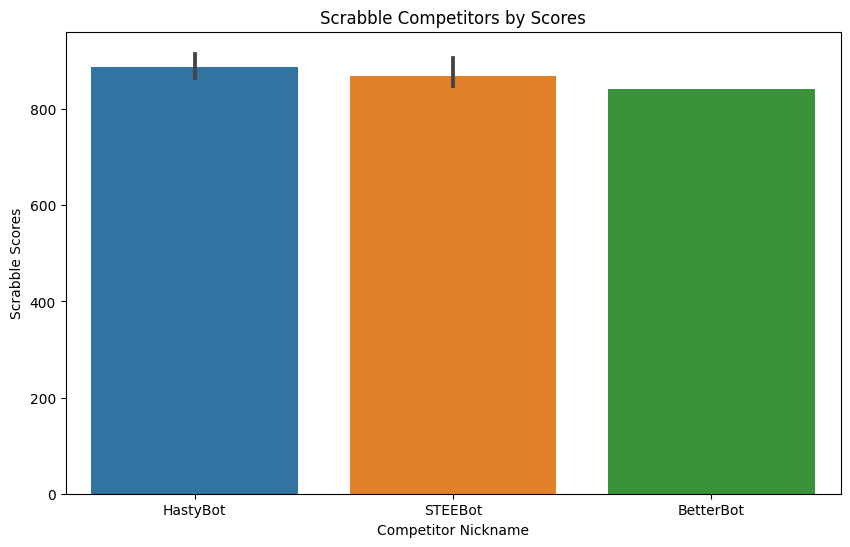

In [ ]:
top_score = train.sort_values(by='score', ascending=False)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(x=top_score.nickname, y=top_score.score)
plt.xticks()
plt.ylabel('Scrabble Scores')
plt.xlabel('Competitor Nickname')
plt.title('Scrabble Competitors by Scores')
plt.show()

<Axes: >

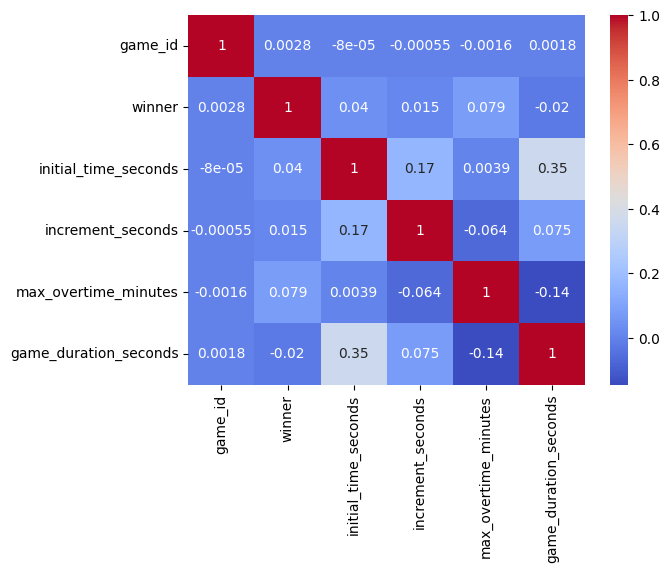

In [ ]:
corr = games.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')


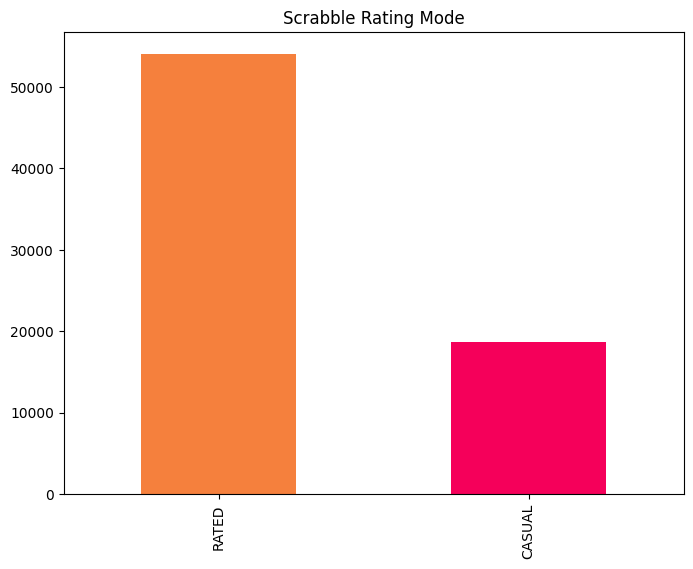

In [ ]:


games["rating_mode"].value_counts().plot.bar(figsize=(8, 6), color=['#f5803d', '#f5005a'], title='Scrabble Rating Mode');

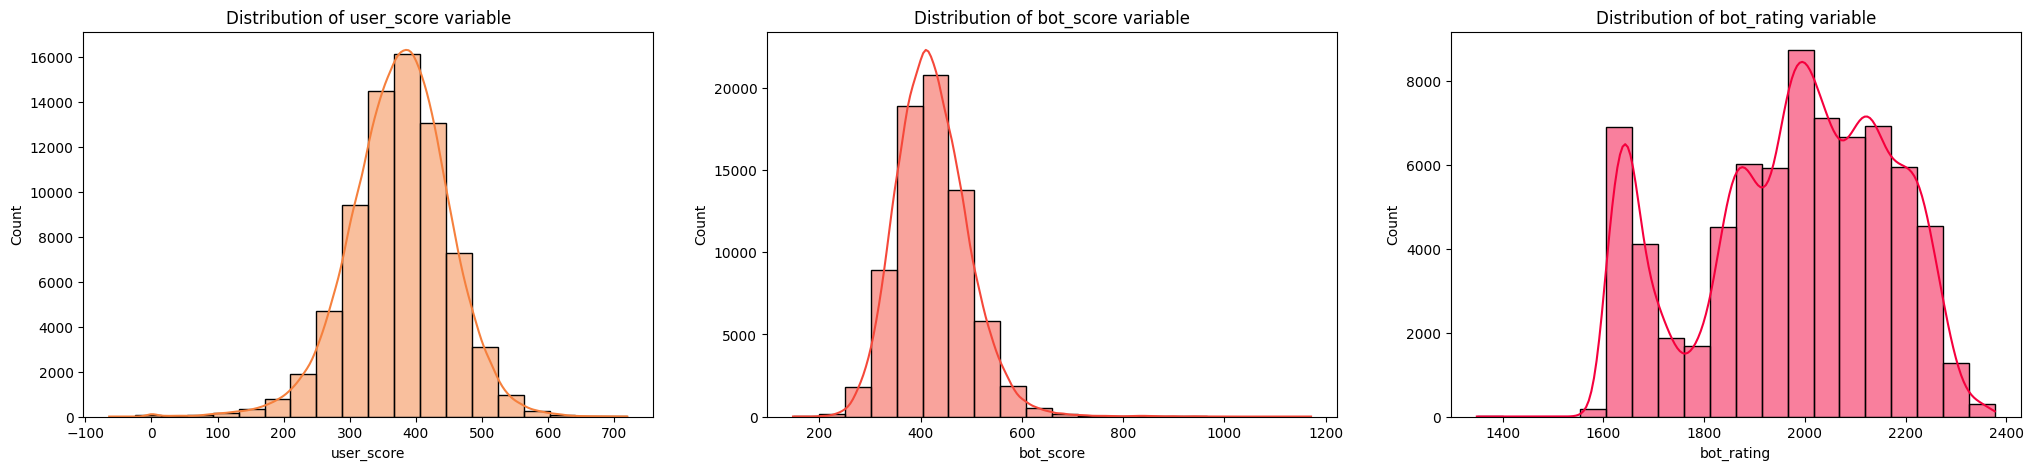

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (25, 5))
ax = axes.flatten()
sns.histplot(ax = axes[0], x = main_df["user_score"], bins = 20, kde = True, color = "#f5803d").set(title = "Distribution of user_score variable");
sns.histplot(ax = axes[1], x = main_df["bot_score"], bins = 20, kde = True, color = "#f5483a").set(title = "Distribution of bot_score variable");
sns.histplot(ax = axes[2], x = main_df["bot_rating"], bins = 20, kde = True, color = "#f5003d").set(title = "Distribution of bot_rating variable");

[Text(0.5, 1.0, 'Relationship between bot_score VS bot_rating')]

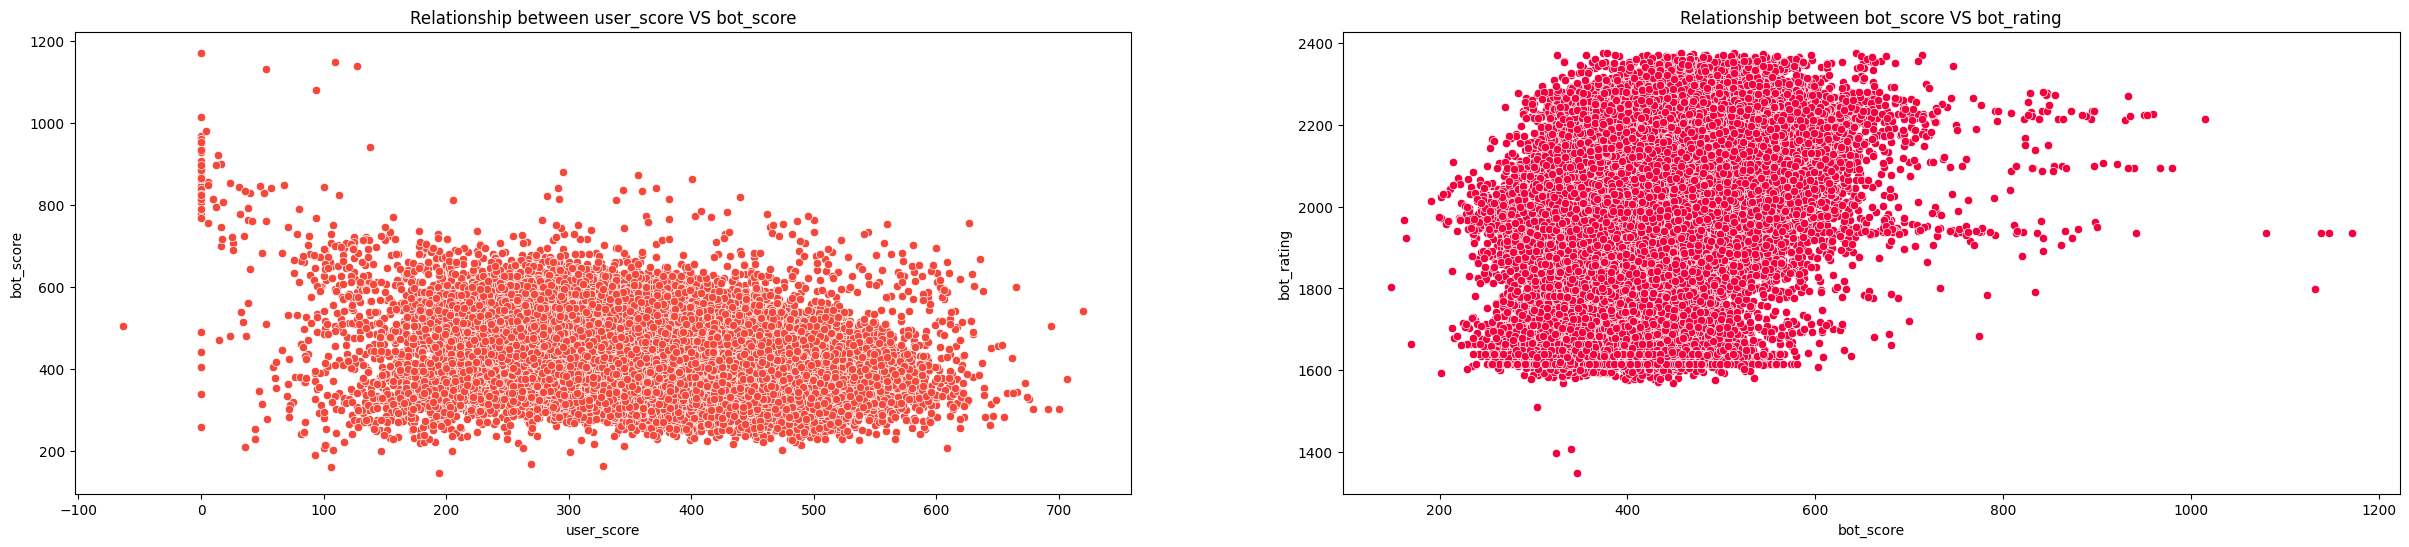

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (30, 6))
axes = axes.flatten()
sns.scatterplot(ax = axes[0], x = "user_score", y = "bot_score", data = main_df, color = "#f5483a").set(title = "Relationship between user_score VS bot_score");
sns.scatterplot(ax = axes[1], x = "bot_score", y = "bot_rating", data = main_df,color = "#f5003d").set(title = "Relationship between bot_score VS bot_rating")


In [ ]:


from sklearn.linear_model import  LinearRegression, Ridge,Lasso
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
model_dict = {
    "linear": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "decision_tree": DecisionTreeRegressor(),
    "random_forest": RandomForestRegressor(),
    "gradient_boosting": GradientBoostingRegressor(),
    "neural_network": MLPRegressor(),
    "lgb": lgb.LGBMRegressor(),
}

In [ ]:

def get_scores(model_dict, X, y, nfolds=5):

    df_score_details = {
        "model": [],
        "(R2)": [],
        "(RMSE)": [],
        "(MAE)": [],
    }
    for model_key in model_dict.keys():
        val_r2_scores = []
        val_rmse_scores = []
        val_mae_scores = []
        kf = KFold(n_splits=nfolds)
        start = time.time()
        # nfolds
        for train_index, val_index in kf.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            model_cls = model_dict[model_key]
            model = model_cls
            model.fit(X_train, y_train)

            val_preds = model.predict(X_val).reshape(-1)
            val_r2_scores.append(r2_score(y_val, val_preds))
            val_rmse_scores.append(mean_squared_error(y_val, val_preds, squared=False))
            val_mae_scores.append(mean_absolute_error(y_val, val_preds))
        df_score_details["model"].append(model_key)
        df_score_details["(R2)"].append(np.mean(val_r2_scores))
        df_score_details["(RMSE)"].append(np.mean(val_rmse_scores))
        df_score_details["(MAE)"].append(np.mean(val_mae_scores))
        elapsed_time = time.time() - start

    df_score = pd.DataFrame(df_score_details)
    return df_score

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import time
train_df
X_train = train_df.drop(["user_name", "user_rating"], axis=1)
y_train = train_df["user_rating"].copy()
X_test = test_df.drop(["user_name", "user_rating"], axis=1)
# CV
df_score = get_scores(model_dict, X_train, y_train, nfolds=2)

In [ ]:
X_test

,game_id,user_score,bot_name,bot_score,bot_rating,user_freq
0,2,488,0,401,2000.0,140
1,7,379,2,377,2082.0,166
2,11,462,2,334,1829.0,269
3,14,359,2,403,2136.0,65
4,27,456,1,453,2258.0,528
...,...,...,...,...,...,...
22358,72760,494,2,386,2030.0,316
22359,72761,232,0,469,2044.0,687
22360,72762,367,0,299,1710.0,58
22361,72768,357,1,524,2356.0,56


In [ ]:
X_train

,game_id,user_score,bot_name,bot_score,bot_rating,user_freq
0,1,429,0,335,1637.0,410
1,3,440,0,318,2071.0,254
2,4,119,0,478,1936.0,205
3,5,325,2,427,1844.0,410
4,6,378,2,427,2143.0,592
...,...,...,...,...,...,...
50405,72767,340,0,414,1952.0,102
50406,72770,97,1,590,2237.0,24
50407,72771,390,1,393,1614.0,6576
50408,72772,388,0,442,1674.0,132


In [ ]:
df_score

,model,(R2),(RMSE),(MAE)
0,linear,0.551497,153.803727,114.360005
1,ridge,0.551497,153.803727,114.360014
2,lasso,0.551455,153.811030,114.381434
3,decision_tree,0.668053,132.292636,72.199207
4,random_forest,0.840775,91.636950,54.945655
5,gradient_boosting,0.721833,121.104251,87.248990
6,neural_network,-0.837522,291.679773,245.651182
7,lgb,0.836670,92.814846,60.482418


In [ ]:
df_score.sort_values("(RMSE)")

,model,(R2),(RMSE),(MAE)
4,random_forest,0.840775,91.636950,54.945655
7,lgb,0.836670,92.814846,60.482418
5,gradient_boosting,0.721833,121.104251,87.248990
3,decision_tree,0.668053,132.292636,72.199207
0,linear,0.551497,153.803727,114.360005
1,ridge,0.551497,153.803727,114.360014
2,lasso,0.551455,153.811030,114.381434
6,neural_network,-0.837522,291.679773,245.651182


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
test_df["user_rating"] = model.predict(test_df.drop(["user_name", "user_rating"], axis=1))
final_sub = test_df[["game_id", "user_rating"]]
final_sub = final_sub.rename(columns={"user_rating": "rating"})

final_sub.to_csv("submission.csv", index=False)


In [ ]:
final_sub

,game_id,rating
0,2,2066.17
1,7,1925.09
2,11,1765.77
3,14,1971.41
4,27,2071.72
...,...,...
22358,72760,1928.55
22359,72761,2006.81
22360,72762,1715.00
22361,72768,1903.18


In [ ]:
#predicting the rating for given dataset using model1
X2_test = train_df.drop(["user_name", "user_rating"], axis=1)
y2_test = train_df["user_rating"].copy()
y=model.predict(X2_test)
y

array([1500.  , 1848.92, 1479.25, ..., 1500.  , 1364.52, 2070.75])

In [ ]:
y = pd.Series(y)

df_score1 = get_scores(model_dict, X2_test, y, nfolds=2)
df_score1


,model,(R2),(RMSE),(MAE)
0,linear,0.598754,139.463390,105.227915
1,ridge,0.598754,139.463391,105.227918
2,lasso,0.598708,139.471321,105.239697
3,decision_tree,0.834029,89.695053,48.009914
4,random_forest,0.917472,63.242182,37.501122
5,gradient_boosting,0.796979,99.199966,70.023898
6,neural_network,0.445287,162.822996,126.318118
7,lgb,0.900554,69.430468,46.561844


In [ ]:
df_score1.sort_values("(RMSE)")

,model,(R2),(RMSE),(MAE)
4,random_forest,0.917472,63.242182,37.501122
7,lgb,0.900554,69.430468,46.561844
3,decision_tree,0.834029,89.695053,48.009914
5,gradient_boosting,0.796979,99.199966,70.023898
0,linear,0.598754,139.463390,105.227915
1,ridge,0.598754,139.463391,105.227918
2,lasso,0.598708,139.471321,105.239697
6,neural_network,0.445287,162.822996,126.318118


In [ ]:
model2=RandomForestRegressor()
model2.fit(X2_test, y)
test_df["user_rating"] = model.predict(test_df.drop(["user_name", "user_rating"], axis=1))
final_sub = test_df[["game_id", "user_rating"]]
final_sub = final_sub.rename(columns={"user_rating": "rating"})
final_sub.to_csv("submission.csv", index=False)

In [ ]:
final_sub

,game_id,rating
0,2,2066.17
1,7,1925.09
2,11,1765.77
3,14,1971.41
4,27,2071.72
...,...,...
22358,72760,1928.55
22359,72761,2006.81
22360,72762,1715.00
22361,72768,1903.18


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pickle
pickle.dump(model2, open('model.pkl','wb'))

In [ ]:
def rating(game_id,user_score,bot_name,bot_score,bot_rating,user_freq):
    x = np.array([game_id,user_score,bot_name,bot_score,bot_rating,user_freq])
    prediction = model2.predict(x.reshape(1,-1))
    return prediction


In [ ]:
description="""
Choose Bot_name : BetterBot = 0 , HastyBot = 1,SteeBot=2
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Scrabble_game_in_progress.jpg",width="600" height="600">
</center>
"""
css_code='body{background-color:#00008B;}'
outputs = gr.outputs.Textbox()
app = gr.Interface(fn = rating,inputs = ['number','number','number','number','number','number'],outputs = outputs,title="Scrabble Game",description = description,css=css_code )

In [ ]:
app.launch()



Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>